# Workflow

In this notebook we generate plots which give of a sense of netCDF-SCM's internal workflow.

In [1]:
import os.path

import netcdf_scm
import tqdm
from netcdf_scm.iris_cube_wrappers import CMIP6OutputCube

import iris.plot
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [2]:
assert netcdf_scm.__version__.startswith("2.0.0")

In [3]:
DATA_DIR = os.path.join("..", "data", "raw", "cmip6-output")

In [4]:
REGIONS_TO_GET = (
    "World",
    "World|Land",
    "World|Ocean",
    "World|Northern Hemisphere",
    "World|Southern Hemisphere",
    "World|Northern Hemisphere|Land",
    "World|Southern Hemisphere|Land",
    "World|Northern Hemisphere|Ocean",
    "World|Southern Hemisphere|Ocean",
    "World|El Nino N3.4",
)

In [5]:
hist_data_dir = os.path.join(
    DATA_DIR,
    "CMIP6",
    "ScenarioMIP",
    "NCAR",
    "CESM2-WACCM",
    "ssp585",
    "r1i1p1f1",
    "Amon",
    "tas",
    "gn",
    "v20190815"
)

In [6]:
tas = CMIP6OutputCube()
tas.load_data_in_directory(hist_data_dir)
tas

In [7]:
areacella = tas.get_metadata_cube("areacella")
areacella

In [8]:
sftlf = tas.get_metadata_cube("sftlf")
sftlf

In [9]:
weights = tas.get_scm_timeseries_weights(regions=REGIONS_TO_GET)
list(weights.keys())

/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8/site-packages/iris/fileformats/netcdf.py:395: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]
/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8/site-packages/iris/fileformats/netcdf.py:395: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]


['World',
 'World|Land',
 'World|Ocean',
 'World|Northern Hemisphere',
 'World|Southern Hemisphere',
 'World|Northern Hemisphere|Land',
 'World|Southern Hemisphere|Land',
 'World|Northern Hemisphere|Ocean',
 'World|Southern Hemisphere|Ocean',
 'World|El Nino N3.4']

In [10]:
ts = tas.get_scm_timeseries(regions=REGIONS_TO_GET)
ts.head()

/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8/site-packages/iris/fileformats/netcdf.py:395: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]
/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8/site-packages/iris/fileformats/netcdf.py:395: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]
/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8/site-packages/iris/fileformats/netcdf.py:395: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]
/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8/site-packages/iris/fileformats/netcdf.py:395: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]
/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8/site-packages/iris/fileformats/netcdf.py:3

time                                                                                                                             2015-01-15 12:00:00  \
activity_id climate_model member_id mip_era model       region                    scenario unit variable variable_standard_name                        
ScenarioMIP CESM2-WACCM   r1i1p1f1  CMIP6   unspecified World                     ssp585   K    tas      air_temperature                  286.672587   
                                                        World|Land                ssp585   K    tas      air_temperature                  278.497742   
                                                        World|Ocean               ssp585   K    tas      air_temperature                  290.060120   
                                                        World|Northern Hemisphere ssp585   K    tas      air_temperature                  283.424710   
                                                        World|Southern Hemisphere ssp585   K    tas      air_temperature                  289.920465   

time                                                                                                                             2015-02-14 00:00:00  \
activity_id climate_model member_id mip_era model       region                    scenario unit variable variable_standard_name                        
ScenarioMIP CESM2-WACCM   r1i1p1f1  CMIP6   unspecified World                     ssp585   K    tas      air_temperature                  286.722305   
                                                        World|Land                ssp585   K    tas      air_temperature                  278.433563   
                                                        World|Ocean               ssp585   K    tas      air_temperature                  290.157013   
                                                        World|Northern Hemisphere ssp585   K    tas      air_temperature                  283.637268   
                                                        World|Southern Hemisphere ssp585   K    tas      air_temperature                  289.807342   

time                                                                                                                             2015-03-15 12:00:00  \
activity_id climate_model member_id mip_era model       region                    scenario unit variable variable_standard_name                        
ScenarioMIP CESM2-WACCM   r1i1p1f1  CMIP6   unspecified World                     ssp585   K    tas      air_temperature                  287.386498   
                                                        World|Land                ssp585   K    tas      air_temperature                  280.568268   
                                                        World|Ocean               ssp585   K    tas      air_temperature                  290.211884   
                                                        World|Northern Hemisphere ssp585   K    tas      air_temperature                  285.573579   
                                                        World|Southern Hemisphere ssp585   K    tas      air_temperature                  289.199416   

time                                                                                                                             2015-04-15 00:00:00  \
activity_id climate_model member_id mip_era model       region                    scenario unit variable variable_standard_name                        
ScenarioMIP CESM2-WACCM   r1i1p1f1  CMIP6   unspecified World                     ssp585   K    tas      air_temperature                  288.184602   
                                                        World|Land                ssp585   K    tas      air_temperature                  283.195221   
                                                        World|Ocean               ssp585   K    tas      air_temperature                  290.252106   
                                             

100%|██████████| 6/6 [00:02<00:00,  2.15it/s]
10it [00:05,  1.79it/s]
<ipython-input-11-7d23076783bf>:60: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


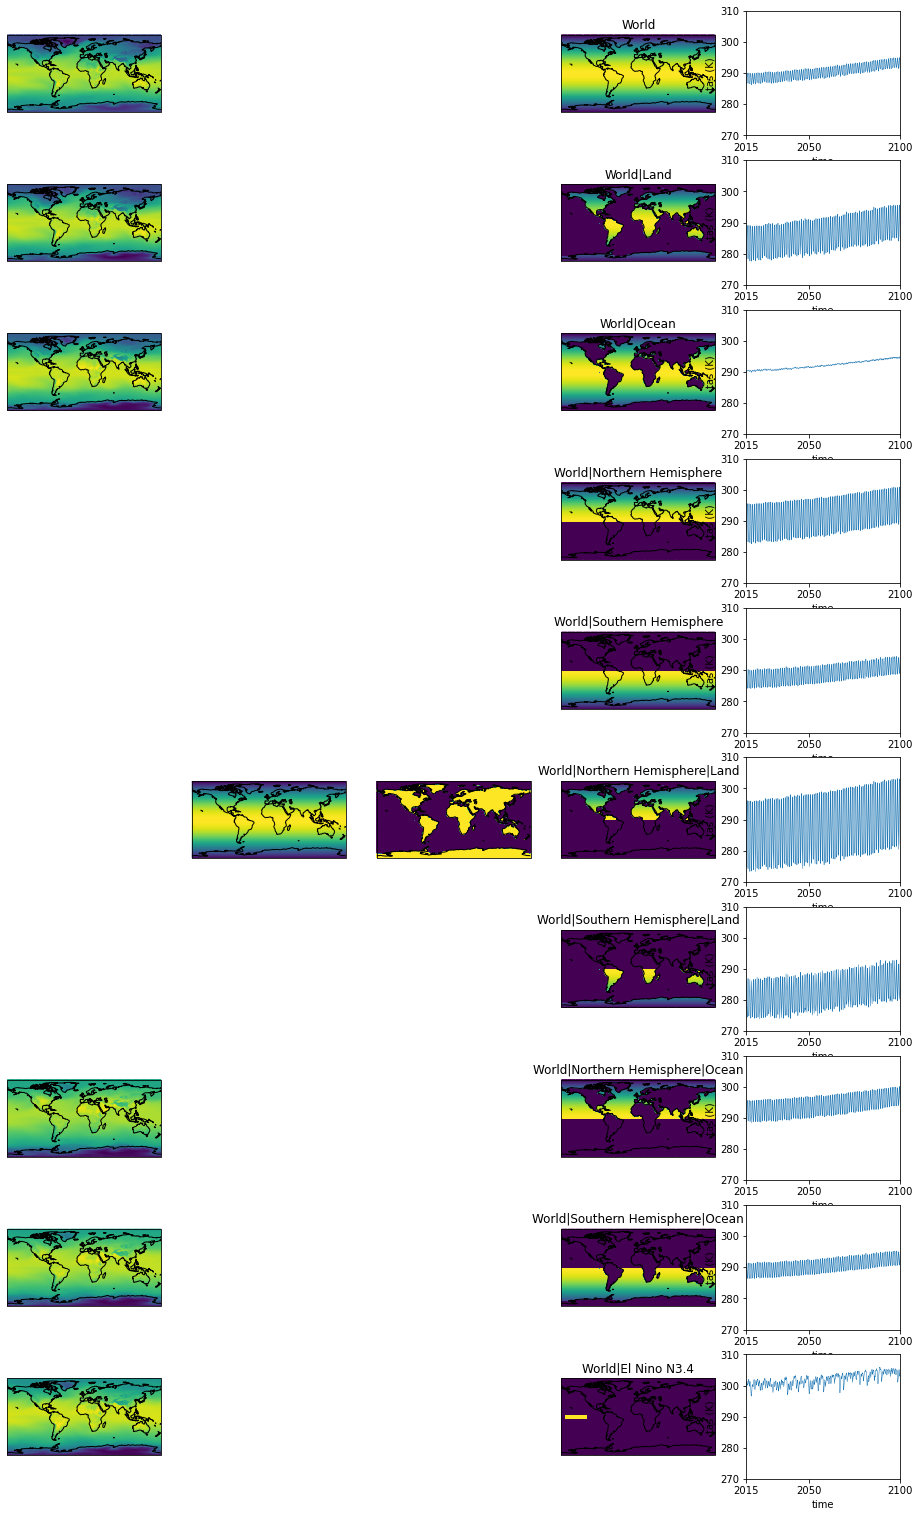

In [11]:
pcolormesh_kwargs = {
    "linewidth": 0,
    "rasterized": True,
}
fig = plt.figure(figsize=(16, 27))

nrows = len(REGIONS_TO_GET)
middle_row = (nrows + 1) // 2
gs = GridSpec(nrows=nrows, ncols=5, figure=fig)

for i in tqdm.tqdm([0, 1, 2, nrows-3, nrows-2, nrows-1]):
    ax = fig.add_subplot(gs[i, 0])
    iris.plot.pcolormesh(tas.cube[i, :, :], **pcolormesh_kwargs)
    plt.gca().coastlines()
#     break

ax = fig.add_subplot(gs[middle_row, 1])
iris.plot.pcolormesh(areacella.cube, **pcolormesh_kwargs)
plt.gca().coastlines()

ax = fig.add_subplot(gs[middle_row, 2])
iris.plot.pcolormesh(sftlf.cube, **pcolormesh_kwargs)
plt.gca().coastlines()

for i, region in tqdm.tqdm(enumerate(REGIONS_TO_GET)):
    ax = fig.add_subplot(gs[i, 3])
    helper = areacella.cube.copy()
    helper.data = weights[region]
    iris.plot.pcolormesh(helper, **pcolormesh_kwargs)
    
    ax = plt.gca()
    ax.coastlines()
    ax.set_title(region)
    
    ax = fig.add_subplot(gs[i, 4])
    pdf = ts.filter(region=region).long_data()
    pdf["time"] = pdf["time"].apply(lambda x: x.year + x.month / 12)
    sns.lineplot(
        data=pdf,
        x="time",
        y="value",
        ax=ax,
        linewidth=0.5,
        legend=False,
    )
#     ax.set_ylim([265, 315])
#     ax.set_xlim([2015, 2300])
#     ax.set_xticks([2015, 2100, 2200, 2300])
    
    ax.set_ylim([270, 310])
    ax.set_xlim([2015, 2100])
    ax.set_xticks([2015, 2050, 2100])
    
    ax.set_ylabel("{} ({})".format(
        ts.get_unique_meta("variable", no_duplicates=True), 
        ts.get_unique_meta("unit", no_duplicates=True)
    ))
#     break
    
plt.tight_layout()
plt.savefig("workflow.pdf", transparent=True)